In [1]:
# It involves working on intel images i.e images of buildings, forest, street etc. A CNN was trained with the images.

In [2]:
# Steps taken in the project

# 1. Visualing images
# 2. Analyze the dimensions to verify all images have same dimensions
# 3. Convert the into numpy array and normalize them
# 4. check the class imbalance
# 5. Split the data and performed one hot encoding
# 6. Created the model architecture , compiled the model and the fit it
# 7. check the accuracy and loss against each epoch
# # 8. Preprocessed the test data and made predictions

In [3]:
# This project can be used to classifiy satellite images, drone images, google images into different classes like sea, mountain etc

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array, array_to_img
# from keras.preprocessing.image import img_to_array, array_to_img
# from keras.preprocessing.image import load_img
from keras.utils.image_utils import img_to_array
from numpy import array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

In [5]:
#Listing Directory
import os
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images"
for file in os.listdir(path):
    print(file)

airplane
car
cat
dog
flower
fruit
motorbike
person


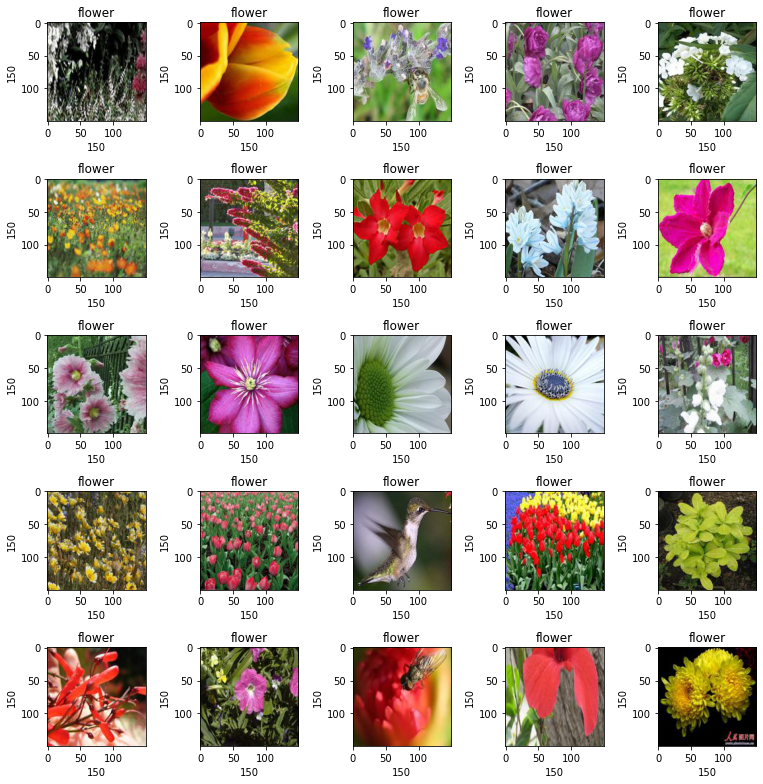

In [6]:
#Plotting 12 images to check dataset
plt.figure(figsize=(11,11))
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/flower"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.title('flower')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [7]:
from PIL import Image
import os

path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/flower" 
size = (150,150) 

for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        with Image.open(os.path.join(path, filename)) as img:
            img = img.resize(size)
            img.save(os.path.join(path, filename))

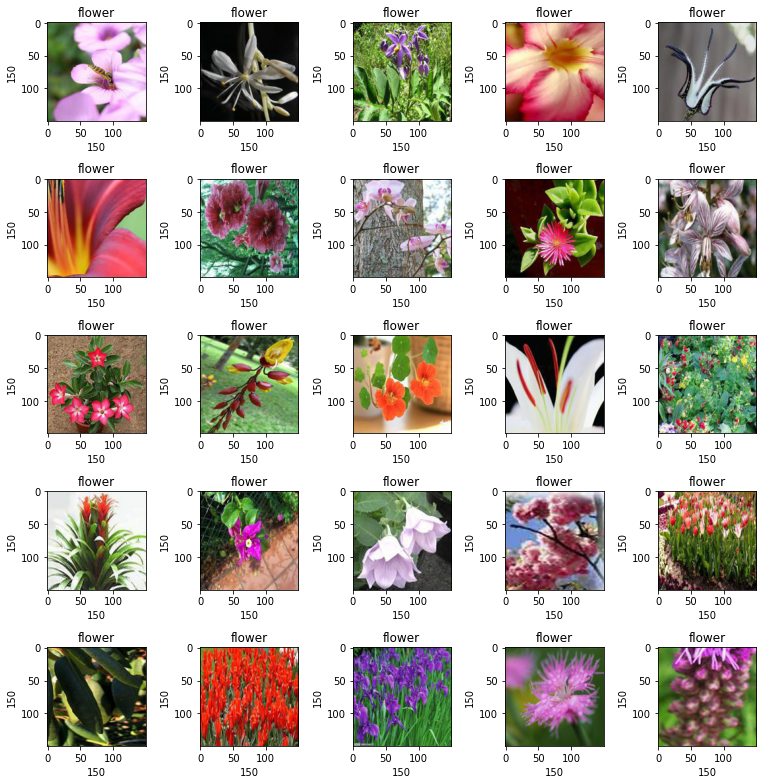

In [8]:
plt.figure(figsize=(11,11))
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/flower"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.title('flower')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [9]:
from PIL import Image
import os

path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/fruit" 
size = (150,150) 

for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        with Image.open(os.path.join(path, filename)) as img:
            img = img.resize(size)
            img.save(os.path.join(path, filename))

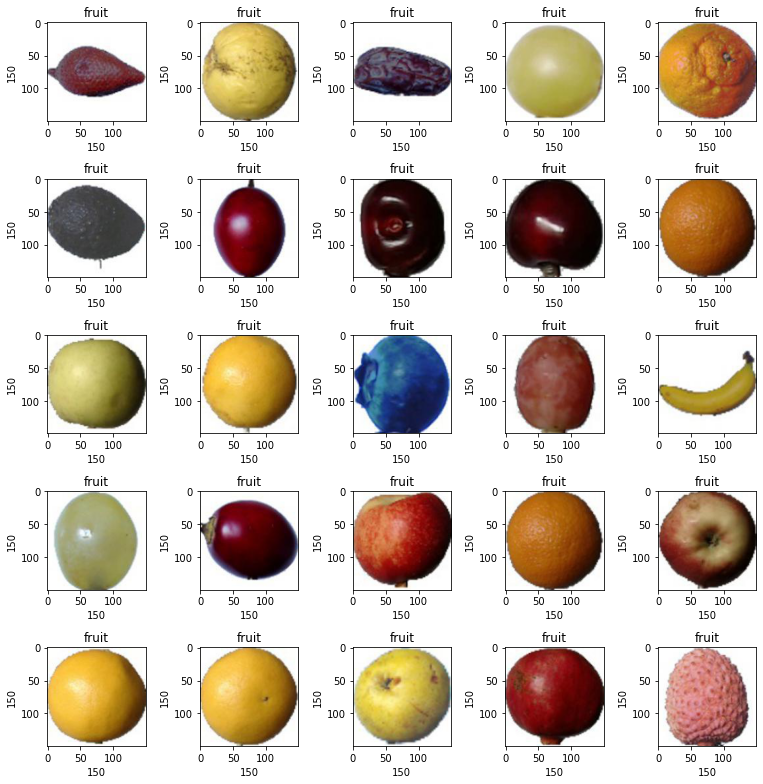

In [10]:
plt.figure(figsize=(11,11))
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/fruit"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.title('fruit')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [11]:
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/motorbike" 
size = (150,150) 

for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        with Image.open(os.path.join(path, filename)) as img:
            img = img.resize(size)
            img.save(os.path.join(path, filename))

In [12]:
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/person" 
size = (150,150) 

for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        with Image.open(os.path.join(path, filename)) as img:
            img = img.resize(size)
            img.save(os.path.join(path, filename))

In [13]:
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/dog" 
size = (150,150) 

for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        with Image.open(os.path.join(path, filename)) as img:
            img = img.resize(size)
            img.save(os.path.join(path, filename))

In [14]:
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/cat" 
size = (150,150) 

for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        with Image.open(os.path.join(path, filename)) as img:
            img = img.resize(size)
            img.save(os.path.join(path, filename))

In [15]:
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/car" 
size = (150,150) 

for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        with Image.open(os.path.join(path, filename)) as img:
            img = img.resize(size)
            img.save(os.path.join(path, filename))

In [16]:
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/airplane" 
size = (150,150) 

for filename in os.listdir(path):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        with Image.open(os.path.join(path, filename)) as img:
            img = img.resize(size)
            img.save(os.path.join(path, filename))

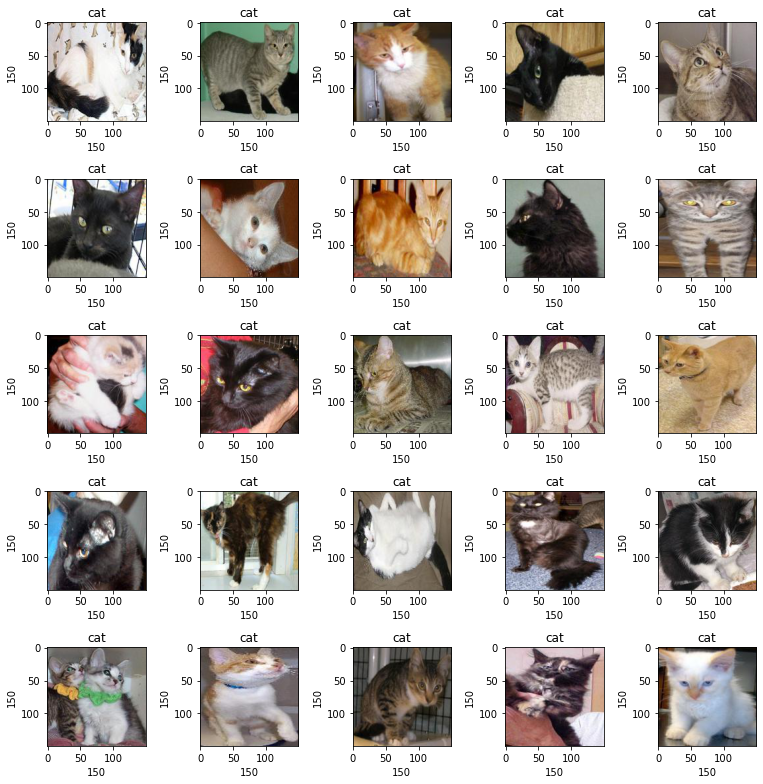

In [17]:
plt.figure(figsize=(11,11))
path = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/cat"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.title('cat')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [18]:
#setting the root directory for the dataset and storing all the folders name of the dataset will also creating 2 empty list for image and labels
dir = "C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images"
root_dir = listdir(dir)
image_list , label_list = [],[]

In [19]:
#Reading and converting image to numpy array
#this also resize all the images just incase any image dont have the same dimensions, thus this reread and resize all the images.

for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
                         image_path = f"{dir}/{directory}/{files}"
                         image = Image.open(image_path)
                         image = image.resize((150,150))
                         image = img_to_array(image)
                         image_list.append(image)
                         label_list.append(directory)

In [20]:
#Visuliaze the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

fruit        1000
person        986
car           968
cat           885
flower        843
motorbike     788
airplane      727
dog           702
dtype: int64

In [21]:
#Checking the count of classes which will be used further in model architecture
num_classes = len(label_counts)
num_classes

8

In [22]:
#to check the shape of the input layer of the model architecture
np.array(image_list).shape

(6899, 150, 150, 3)

In [23]:
#13798 images size 150 by 150, coloured

In [24]:
#Spliiting the data
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size = 0.2, random_state= 10)

In [25]:
# Normalizing the images by dividing them with 255 and we also reshape x_train and x_test data
x_train = np.array(x_train, dtype = np.float16)/255.0
x_test = np.array(x_test, dtype = np.float16)/255.0
x_train = x_train.reshape(-1,150,150,3)
x_test = x_test.reshape(-1,150,150,3)

In [26]:
# Label binarizer to one hot encode our y data. 
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['airplane' 'car' 'cat' 'dog' 'flower' 'fruit' 'motorbike' 'person']


In [27]:
#splitting the training data set into training and validation data sets
x_train, x_val, y_train , y_val = train_test_split(x_train, y_train , test_size = 0.2)

In [28]:
from keras.layers import BatchNormalization
model = Sequential([
    Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
    BatchNormalization(),
    LeakyReLU(),
    
    Conv2D(32, kernel_size = (3,3)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(5,5),
    
    Conv2D(16, kernel_size = (3,3)),
    BatchNormalization(),
    LeakyReLU(),
    
    Conv2D(128, kernel_size = (3,3), input_shape = (150,150,3)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D(5,5),
    
    Flatten(),
    
    Dense(64),
    Dropout(rate=0.2),
    BatchNormalization(),
    LeakyReLU(),
    
    Dense(32),
    Dropout(rate=0.2),
    BatchNormalization(),
    LeakyReLU(),
    
    Dense(64),
    Dropout(rate=0.2),
    BatchNormalization(),
    LeakyReLU(1),
    
    Dense(8, activation = 'softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 146, 146, 32)      0

In [29]:
# #I created a network architecture for the model. I used BatchNormalization , a technique for training deep neural networks that 
# standardizes the input into layer for each minibatch. The leakyReLu modifies the function to allow small negative values when input is less than zero. 


In [30]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005), metrics= ['accuracy'])

In [31]:
epochs = 20
batch_size = 128

history = model.fit(x_train, y_train, batch_size= batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/20
35/35 [==============================] - 64s 2s/step - loss: 1.2114 - accuracy: 0.5860 - val_loss: 2.1092 - val_accuracy: 0.1576
Epoch 2/20
35/35 [==============================] - 57s 2s/step - loss: 0.6227 - accuracy: 0.8113 - val_loss: 2.1791 - val_accuracy: 0.1196
Epoch 3/20
35/35 [==============================] - 56s 2s/step - loss: 0.4430 - accuracy: 0.8648 - val_loss: 2.3468 - val_accuracy: 0.1196
Epoch 4/20
35/35 [==============================] - 56s 2s/step - loss: 0.3510 - accuracy: 0.8969 - val_loss: 2.4527 - val_accuracy: 0.1196
Epoch 5/20
35/35 [==============================] - 56s 2s/step - loss: 0.2782 - accuracy: 0.9180 - val_loss: 2.6627 - val_accuracy: 0.1196
Epoch 6/20
35/35 [==============================] - 57s 2s/step - loss: 0.2288 - accuracy: 0.9366 - val_loss: 2.6116 - val_accuracy: 0.1712
Epoch 7/20
35/35 [==============================] - 57s 2s/step - loss: 0.1964 - accuracy: 0.9472 - val_loss: 2.7988 - val_accuracy: 0.1739
Epoch 8/20
35/35 [==

In [32]:
model.save("C:/Users/onata/Documents/Data Projects/Linkedin and github project/Intel Image classification/Intel Images/intel_image.h5")

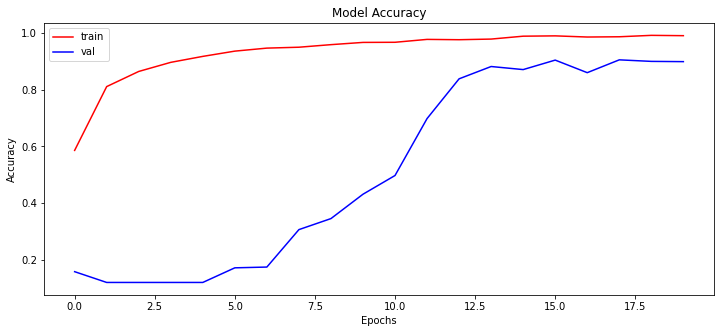

In [33]:
#plot the training history
plt.figure(figsize= (12,5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

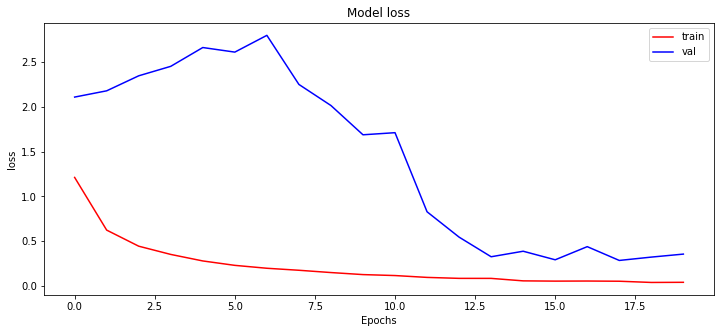

In [34]:
#Plot the loss of the model for training history
plt.figure(figsize= (12,5))
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'b')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [35]:
#to get the accuracy of test data
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

44/44 [==============================] - 4s 83ms/step - loss: 0.3252 - accuracy: 0.9065
Test Accuracy: 90.6521737575531


In [36]:
#Generating predictions for test data and storing them into y_pred

y_pred = model.predict(x_test)

44/44 [==============================] - 4s 79ms/step


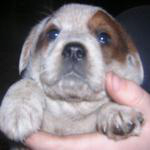

In [37]:
#Plotting image to compare
img = array_to_img(x_test[1])
img

In [38]:
#Finding max value from prediction list and comapring original value vs predicted 
labels = lb.classes_
print(labels)
print("Originally: ", labels[np.argmax(y_test[1])])
print("Predicted: ", labels[np.argmax(y_pred[1])])

['airplane' 'car' 'cat' 'dog' 'flower' 'fruit' 'motorbike' 'person']
Originally:  dog
Predicted:  dog
